Applied Machine Learning - Project 1

Dimosthenis Plavos-3200156 

# Exploring AirBnB in Athens


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
listings = pd.read_csv('data/listings.csv')
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')
reviews = pd.read_csv('data/reviews.csv')
calendar = pd.read_csv('data/calendar.csv.gz', compression='gzip')

## 1. Neighbourhood Listings in Descending Order

Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

Explanation: I determined the sorting criteria for arranging listings based on their popularity as follows:
1. Firstly, I divided the ratings into 10 bins, each containing a specific range of values. For instance, the bin [4.5-5] includes listings with ratings falling within that range. The sorting process begins in descending order of these bins.
2. Then, within each bin, the sorting is determined by the 'number_of_reviews'.
3. If the listings have the same amount of reviews, the sorting depends on the 'review_rating'.
4. In the end, 'availability_365' is used for the final sorting. The reason i added this fynctionality, is most importantly for the listings with 0 reviews. It helps distinguish the ones that have a lower availability, which means that some bookings have already occurred, so they are probably more popular. 

PS. We can also exclude the listings that have availability = 0. I have the commands in comments. Not needed for this exercise but useful in general.

In [29]:
neighbourhood_counts = listings['neighbourhood'].value_counts()
sorted_neighbourhoods = neighbourhood_counts.index

# Extract the rating of each listing, to use it in the sorting process
listings['review_rating'] = listings['name'].str.extract('★(\\d+\\.\\d+)')
listings['review_rating'] = pd.to_numeric(listings['review_rating'])

# 10 bins, values between 0-5
bins = np.linspace(0., 5., 11)

for neighbourhood in sorted_neighbourhoods:
    group = listings[listings['neighbourhood'] == neighbourhood][['id', 'name', 'number_of_reviews_ltm', 'review_rating','availability_365']]
    
    # Create the 'Rating Bin' column based on the 'review_rating' bins
    group['Rating Bin'] = pd.cut(group['review_rating'], bins=bins)
    
    # Sort by the 'Rating Bin' in descending order
    group = group.sort_values(by=['Rating Bin','number_of_reviews_ltm', 'review_rating','availability_365'], ascending=[False,False,False,True])
    
#     # Exclude rows where 'availability_365' is not equal to 0
#     group = group[group['availability_365'] != 0]
    
     # Exclude the 'Rating Bin' column from printing
    group = group.drop(columns=['Rating Bin'])
    
    print(f"Neighbourhood: {neighbourhood}")
    print(group)
    print("\n")


Neighbourhood: ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
                      id                                               name  \
7284            54251276  Hostel in Athina · ★4.58 · 1 bedroom · 1 bed ·...   
823             13842245  Rental unit in Athina · ★4.86 · 1 bedroom · 2 ...   
738             13409388  Rental unit in Athina · ★4.88 · 1 bedroom · 3 ...   
1505            19901354  Condo in Athina · ★4.99 · 1 bedroom · 1 bed · ...   
8004  628014578986481086  Rental unit in Athina · ★4.94 · 1 bedroom · 1 ...   
...                  ...                                                ...   
4744            38719314  Condo in Athina · 2 bedrooms · 2 beds · 1.5 sh...   
5290            42145975  Hostel in Athina · 1 bedroom · 4 beds · 1 shar...   
5292            42146305  Hostel in Athina · 1 bedroom · 4 beds · 1 shar...   
5298            42147021  Hostel in Athina · 1 bedroom · 3 beds · 1 shar...   
8214  648786710110052050  Camper/RV in Athina · 1 bedroom · 1 bed · 0 baths   

      number_

## 2. Neighbourhood Prices in Descending Order

Create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices.

In [30]:
neighbourhood_counts = listings['neighbourhood'].value_counts()

# Group the data by 'neighbourhood' and calculate median, mean, and standard deviation of price
neighborhood_stats = listings.groupby('neighbourhood')['price'].agg(['median', 'mean', 'std'])

# Set name for the columns 
neighborhood_stats = neighborhood_stats.rename(columns={'median': 'Median Price', 'mean': 'Mean Price', 'std': 'Std Deviation'})

# Merge with the number of listings
neighborhood_stats = pd.concat([neighbourhood_counts, neighborhood_stats], axis=1)

# Rename the 'count' column to 'Number of Listings'
neighborhood_stats = neighborhood_stats.rename(columns={'count': 'Number of Listings'})

# Sort the data by Median Price in descending order
neighborhood_stats = neighborhood_stats.sort_values(by='Median Price', ascending=False)

# Print the table. .to_markdown() improves the form of the result
print(neighborhood_stats.to_markdown())

| neighbourhood                    |   Number of Listings |   Median Price |   Mean Price |   Std Deviation |
|:---------------------------------|---------------------:|---------------:|-------------:|----------------:|
| ΡΗΓΙΛΛΗΣ                         |                    5 |          120   |     367.8    |       578.623   |
| ΖΑΠΠΕΙΟ                          |                  161 |          114   |     224.068  |       641.163   |
| ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ           |                 2416 |          104   |     140.651  |       229.183   |
| ΚΟΛΩΝΑΚΙ                         |                  425 |          100   |     128.595  |       104.431   |
| ΑΚΡΟΠΟΛΗ                         |                  386 |          100   |     195.345  |       703.322   |
| ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ              |                 1122 |           90.5 |     120.284  |       104.614   |
| ΘΗΣΕΙΟ                           |                  386 |           90   |     126.492  |       124.177   |
| ΚΕΡΑΜΕΙΚ

## 3. Availability per Day

Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

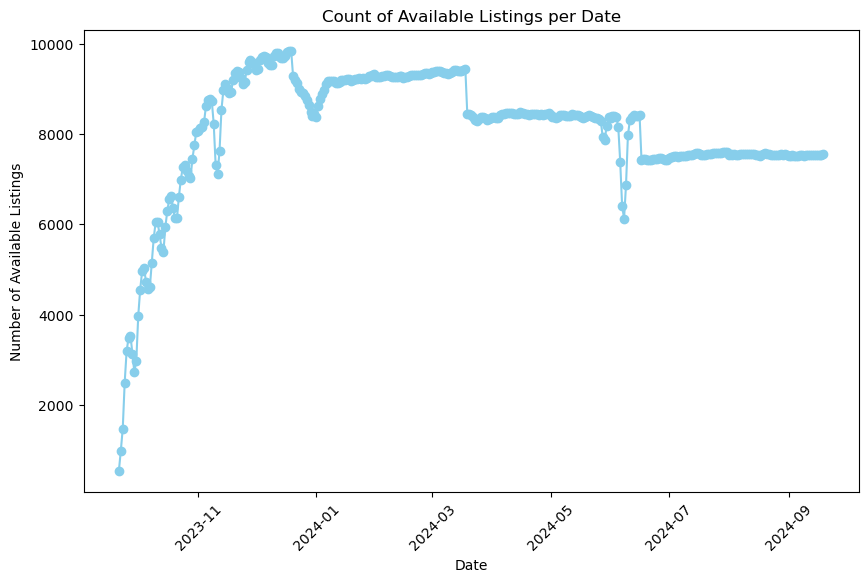

In [31]:
# Convert the 'date' column to a datetime object
calendar['date'] = pd.to_datetime(calendar['date'])

# Include only rows where listings are available ('available' == 't')
available_listings = calendar[calendar['available'] == 't']

# Group by 'date' and calculate the count of available listings
date_counts_available = available_listings.groupby('date')['date'].count()

# Create a new DataFrame 'calendar_count_available' with the count of available listings
calendar_count_available = pd.DataFrame({'Number of Available Listings': date_counts_available})

calendar_count_available.reset_index(inplace=True)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(calendar_count_available['date'], calendar_count_available['Number of Available Listings'], marker='o', linestyle='-', color='skyblue')
plt.title('Count of Available Listings per Date')
plt.xlabel('Date')
plt.ylabel('Number of Available Listings')
plt.xticks(rotation=45) 

# Show the plot
plt.show()

## 4. Reviews, Occupacy per Listing, Average Income

Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

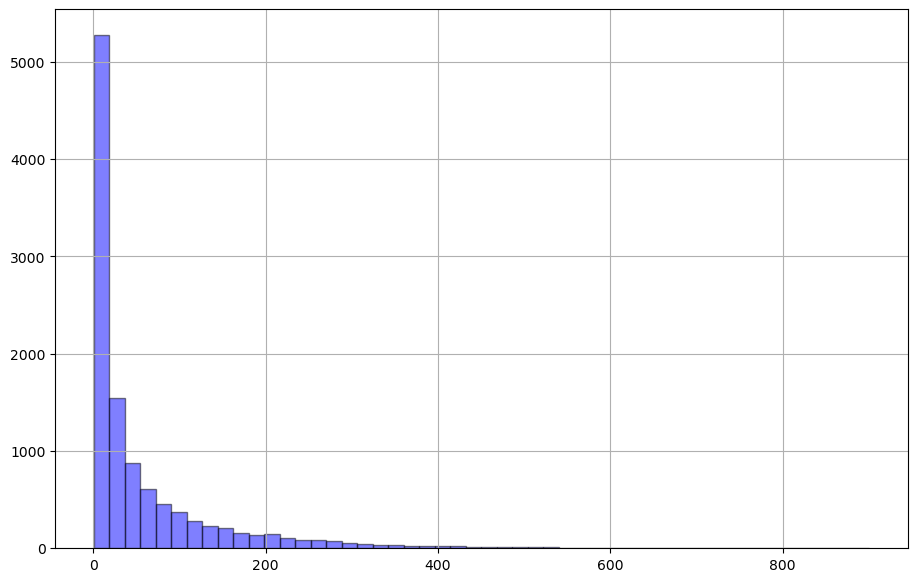

In [32]:
# Group the data by 'listing_id' and calculate the count of reviews for each listing
listing_reviews = reviews['listing_id'].value_counts()

# Calculate the minimum and maximum number of reviews in a listing
min_reviews = listing_reviews.min()
max_reviews = np.ceil(listing_reviews.max() / 100) * 100

# Print the histogram
_ = listing_reviews.hist(bins=np.linspace(min_reviews, max_reviews, 51), 
                             color='blue', edgecolor='black', 
                             alpha=0.5, figsize=(11, 7))

In [33]:
# Convert the 'date' column to a datetime object
reviews['date'] = pd.to_datetime(reviews['date'])

# Calculate the earliest and latest date to determine the data span
earliest_date = reviews['date'].min()
latest_date = reviews['date'].max()

# Calculate the total number of months covered by the dataset
total_months_span = ((latest_date.year - earliest_date.year) * 12 + latest_date.month - earliest_date.month) + 1

# Calculate the average reviews per month over the total data span
average_reviews_per_month = reviews.shape[0] / total_months_span
# Calculate the average occupacy per month (half of them result in reviews)
average_occupacy_per_month = average_reviews_per_month * 2

# Print the results
print(f"Average Reviews per Month: {average_reviews_per_month:.2f}")
print(f"Average Occupacy per Month: {average_occupacy_per_month:.2f}")

Average Reviews per Month: 3965.90
Average Occupacy per Month: 7931.80


In [34]:
# Calculate the average price per night
average_price_per_night = listings['price'].mean()

# Assuming that each booking is for a 3 nights stay
average_income_per_month = average_occupacy_per_month * 3 * average_price_per_night
print(f"Average Income Per Month: ${average_income_per_month:.2f}")

Average Income Per Month: $2628405.85


## 5. Listings per Room Type

Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type.

In [35]:
room_type_counts = listings['room_type'].value_counts()

# Calculate the percentage of listings for each room type
room_type_percentages = (room_type_counts / len(listings)) * 100

# Merge the counts and percentages into a DataFrame
room_type_stats = pd.DataFrame({'Count': room_type_counts, 'Percentage': room_type_percentages})

# Group the data by 'neighbourhood' and 'room_type' and calculate the count of listings
listings_by_neighborhood_room = listings.groupby(['neighbourhood', 'room_type']).size().reset_index(name='Count')

# Print the result
print(listings_by_neighborhood_room.to_markdown())

|     | neighbourhood                    | room_type       |   Count |
|----:|:---------------------------------|:----------------|--------:|
|   0 | 1Ο ΝΕΚΡΟΤΑΦΕΙΟ                   | Entire home/apt |      55 |
|   1 | ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                 | Entire home/apt |      33 |
|   2 | ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                 | Private room    |       5 |
|   3 | ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ | Entire home/apt |     686 |
|   4 | ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ | Hotel room      |       4 |
|   5 | ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ | Private room    |     117 |
|   6 | ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ | Shared room     |      10 |
|   7 | ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                   | Entire home/apt |      91 |
|   8 | ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                   | Private room    |       8 |
|   9 | ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                | Entire home/apt |      74 |
|  10 | ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                | Private room    |       2 |
|  11 | ΑΚΡΟΠΟΛΗ                         | Entire home/apt |     360 |
|  12 

## 6. Prices per Day

Create a table with the average price per listing per day. Draw a graph visualizing the table.

In [36]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the average price per listing for each of the 365 days  
average_price_per_day = calendar.groupby('date')['price'].mean().reset_index()

# Print the result
print(average_price_per_day.to_markdown(index=False))


| date                |   price |
|:--------------------|--------:|
| 2023-09-21 00:00:00 | 113.108 |
| 2023-09-22 00:00:00 | 116.212 |
| 2023-09-23 00:00:00 | 116.265 |
| 2023-09-24 00:00:00 | 113.046 |
| 2023-09-25 00:00:00 | 111.629 |
| 2023-09-26 00:00:00 | 111.731 |
| 2023-09-27 00:00:00 | 112.724 |
| 2023-09-28 00:00:00 | 113.796 |
| 2023-09-29 00:00:00 | 117.201 |
| 2023-09-30 00:00:00 | 116.834 |
| 2023-10-01 00:00:00 | 111.551 |
| 2023-10-02 00:00:00 | 110.393 |
| 2023-10-03 00:00:00 | 109.389 |
| 2023-10-04 00:00:00 | 109.244 |
| 2023-10-05 00:00:00 | 110.017 |
| 2023-10-06 00:00:00 | 112.093 |
| 2023-10-07 00:00:00 | 113.281 |
| 2023-10-08 00:00:00 | 110.921 |
| 2023-10-09 00:00:00 | 109.489 |
| 2023-10-10 00:00:00 | 109.164 |
| 2023-10-11 00:00:00 | 109.268 |
| 2023-10-12 00:00:00 | 109.814 |
| 2023-10-13 00:00:00 | 112.017 |
| 2023-10-14 00:00:00 | 112.417 |
| 2023-10-15 00:00:00 | 109.69  |
| 2023-10-16 00:00:00 | 109.479 |
| 2023-10-17 00:00:00 | 109.172 |
| 2023-10-18 0

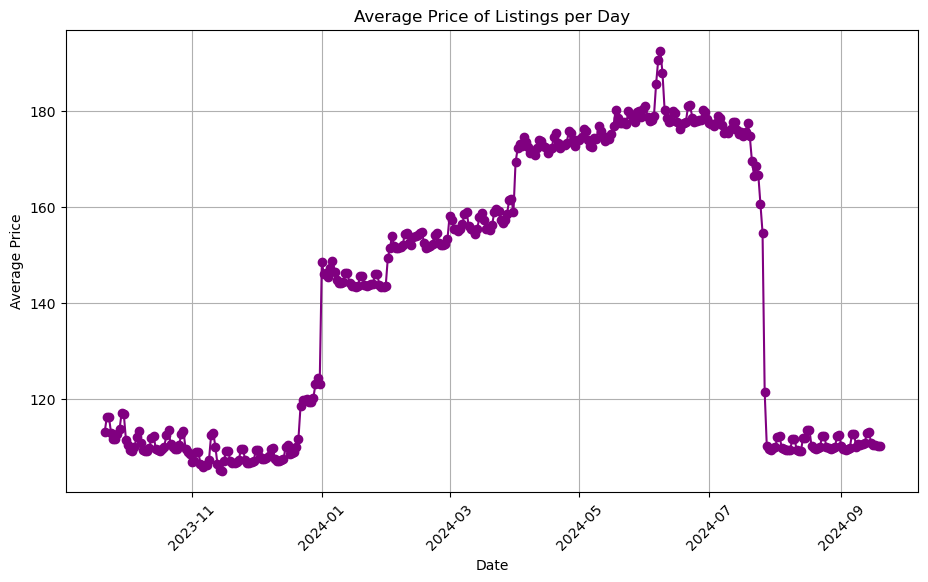

In [37]:
# Convert the 'date' column to a datetime object
average_price_per_day['date'] = pd.to_datetime(average_price_per_day['date'])

plt.figure(figsize=(11, 6))
plt.plot(average_price_per_day['date'], average_price_per_day['price'], marker='o', linestyle='-', color='purple')
plt.title('Average Price of Listings per Day')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)

# Show the graph
plt.show()

## 7. Listings per Host

Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.

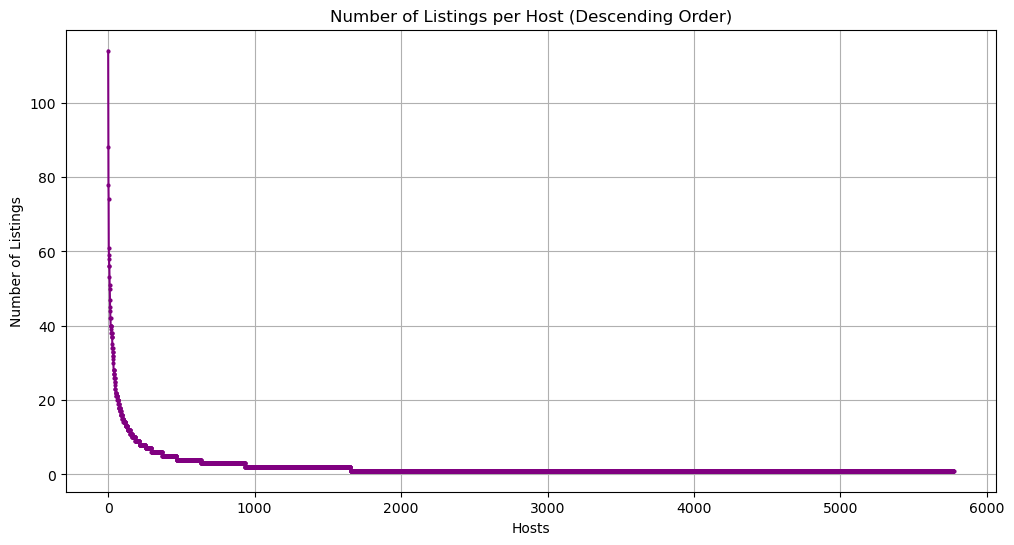

In [38]:
# Group the data by 'host_id' and calculate the count of listings per host
listings_per_host = listings['host_id'].value_counts().reset_index()

# Set a name for the columns 
listings_per_host.columns = ['host_id', 'Number of Listings']

# Sort the data in descending order by the number of listings
listings_per_host = listings_per_host.sort_values(by='Number of Listings', ascending=False)

# Create a line chart. y-axis has the number of listings
_ = pd.Series(listings_per_host['Number of Listings'].to_numpy()).plot(kind='line', figsize=(12, 6),color='purple', marker='o', markersize=2)
plt.title('Number of Listings per Host (Descending Order)')
plt.xlabel('Hosts')
plt.ylabel('Number of Listings')
plt.grid(True)

# Show the graph
plt.show()

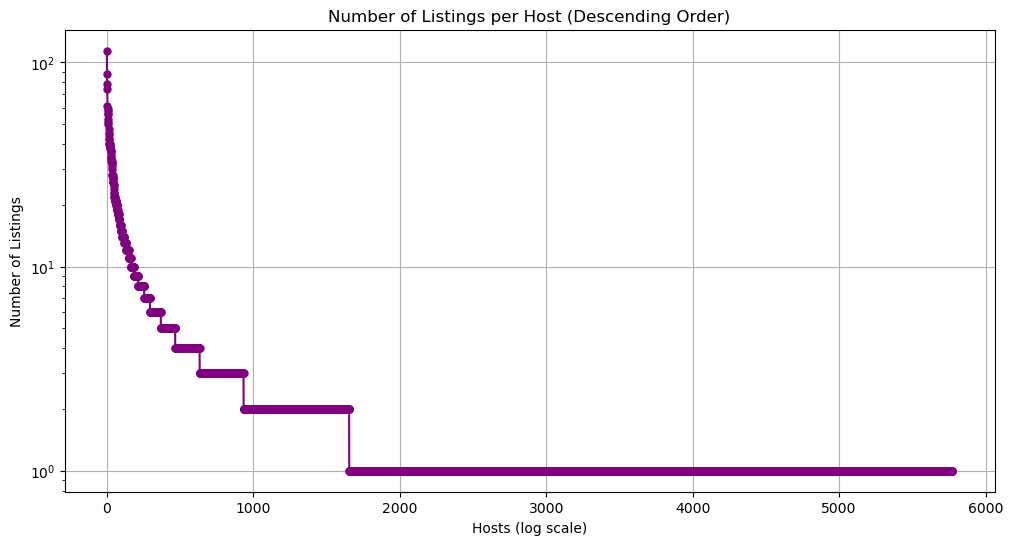

In [39]:
# Create a line chart. Now having x-axis in logarithmic scale
_ = pd.Series(listings_per_host['Number of Listings'].to_numpy()).plot(kind='line', figsize=(12, 6),color='purple', marker='o', markersize=5)
plt.title('Number of Listings per Host (Descending Order)')
plt.xlabel('Hosts (log scale)')
plt.ylabel('Number of Listings')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.grid(True)

# Show the graph
plt.show()

## 8. Visualize Listings

Draw an interactive map to show the listings ovelayed on Athens.

You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you make wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

Hint: be careful witht he description data, if they contain some characters they may not be rendered in HTML and may destroy your output.

In [40]:
import folium
# Create a map starting in the center of Athens
athens_map = folium.Map(location=[37.983810, 23.727539], zoom_start=13, max_zoom=15)

# Iterate through the listings and add markers to the map
for index, row in listings.iterrows():
    #The description that will appear when we click a marker
    listing_description = f"<b>{row['neighbourhood']}</b><br><br>{row['name']}<br><b>Price:</b> ${row['price']}<br><b>Room Type:</b> {row['room_type']}"

    listing_description = folium.Html(listing_description, script=True)

    folium.Marker(
        location=[row['latitude'], row['longitude']],
        tooltip=row['name'],  # When hovering, the name will appear
        popup=folium.Popup(listing_description, max_width=250),
    ).add_to(athens_map)

# Save the map as an HTML file
athens_map.save('athens_listings_map.html')